<a href="https://colab.research.google.com/github/Jenny000327/ML_study/blob/main/Summer_Fashion_Sales_Prediction_with_Machine_Learning_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#한글 폰트 깨짐 방지.
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/u

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 전처리

### 데이터 가져오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/전산물리/summer-products-with-rating-and-performance_2020-08.csv')
df

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


### 데이터 정보

In [ ]:
# 데이터 프레임 정보 출력 => 데이터의 전반적인 특성 파악.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
#기술통계량을 보여주는 메소드
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [ ]:
#소수점 자리수를 반올림하여 표시. => 소수점 이하의 숫자들이 눈에 더 잘 들어오고 보기 편함.
round(df.describe())

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,1528.0,1528.0,1528.0,1528.0,...,1573.0,1573.0,1573.0,1573.0,1573.0,1573.0,473.0,1573.0,1573.0,1573.0
mean,8.0,23.0,4339.0,0.0,4.0,890.0,442.0,180.0,135.0,64.0,...,0.0,33.0,2.0,0.0,40.0,50.0,1.0,26496.0,4.0,0.0
std,4.0,30.0,9357.0,0.0,1.0,1984.0,980.0,401.0,312.0,151.0,...,0.0,21.0,1.0,0.0,20.0,3.0,0.0,78474.0,0.0,0.0
min,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,2.0,0.0
25%,6.0,7.0,100.0,0.0,4.0,24.0,12.0,5.0,4.0,2.0,...,0.0,6.0,2.0,0.0,31.0,50.0,1.0,1987.0,4.0,0.0
50%,8.0,10.0,1000.0,0.0,4.0,150.0,79.0,32.0,24.0,11.0,...,0.0,50.0,2.0,0.0,40.0,50.0,1.0,7936.0,4.0,0.0
75%,11.0,26.0,5000.0,1.0,4.0,855.0,414.0,168.0,129.0,62.0,...,0.0,50.0,3.0,0.0,43.0,50.0,1.0,24564.0,4.0,0.0
max,49.0,252.0,100000.0,1.0,5.0,20744.0,11548.0,4152.0,3658.0,2003.0,...,1.0,50.0,12.0,1.0,140.0,50.0,1.0,2174765.0,5.0,1.0


### 결측치 확인

In [ ]:
#데이터 프레임에서 결측치가 있는 열들의 갯수 출력
df.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

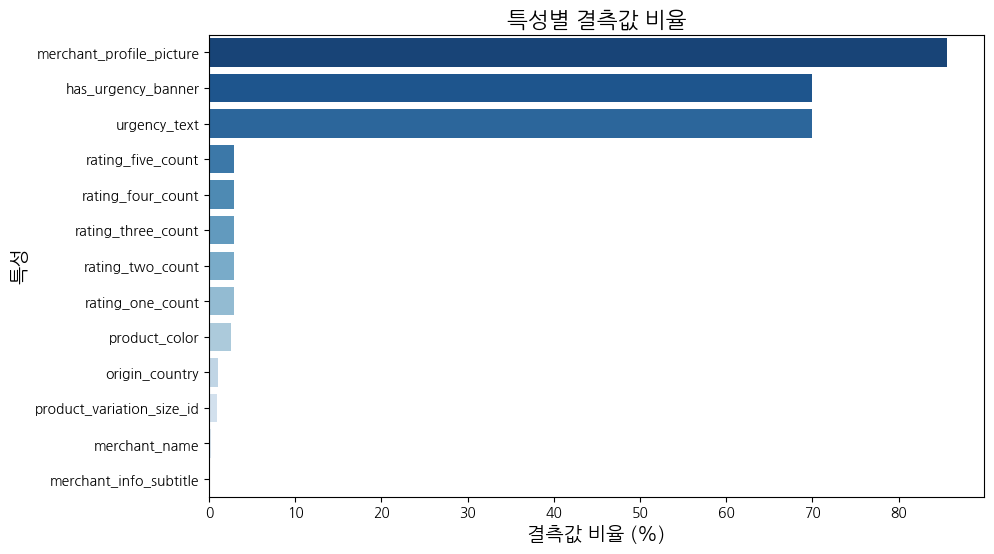

In [ ]:
def missing_data(dataframe):
    features_with_null = dataframe.columns[dataframe.isna().sum() > 0]
    null_pct = (dataframe[features_with_null].isna().sum() / dataframe.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(10,6))
    plt.title('특성별 결측값 비율', fontsize=16)
    sns.barplot(y = null_pct.index, x = null_pct, orient='h', palette='Blues_r')
    plt.xlabel('결측값 비율 (%)', fontsize=14)
    plt.ylabel('특성', fontsize=14)
    plt.show()

missing_data(df)

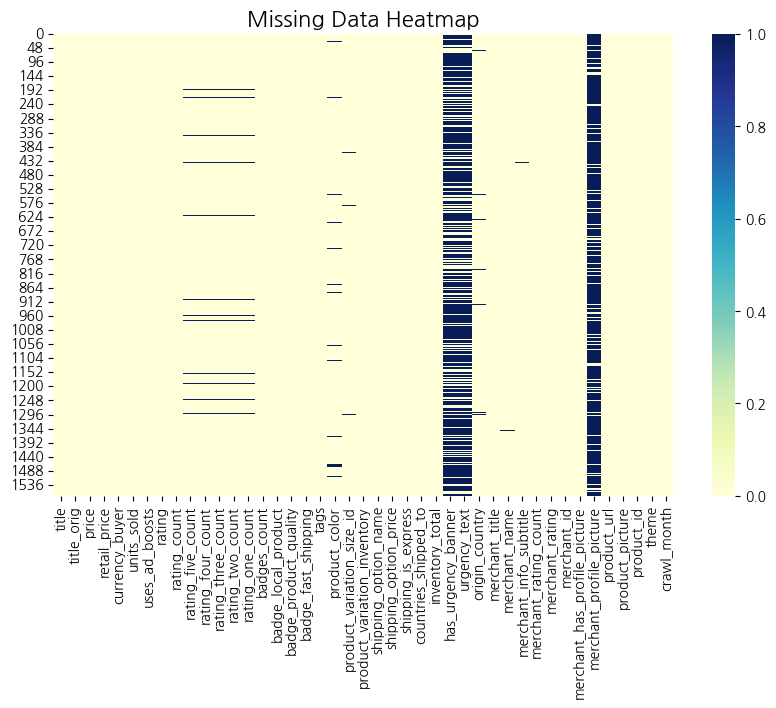

In [ ]:
def heat_missing_data(df):
    plt.figure(figsize=(10,6))
    plt.title('Missing Data Heatmap', fontsize=16)
    sns.heatmap(df.isnull(), cmap='YlGnBu')
    plt.show()
heat_missing_data(df)

### 중복값 확인

In [ ]:
# 중복 수
print("중복 수:", df.duplicated().sum())

중복 수: 34


In [ ]:
duplicateRowsDF = df[df.duplicated()]
print("중복 수 :", len(duplicateRowsDF))
print(duplicateRowsDF)

중복 수 : 34
                                                  title  \
311   Women's Summer Fashion Spaghetti Strap Dress F...   
411   New Women Ladies Fashion Summer Skinny High Wa...   
447   Womens Summer Fashion Lip Print 2pc Set Ladies...   
505   Plus la taille des femmes de la mode lâche déc...   
571   Summer Women Fashion Fashion Robe courte sans ...   
684   Femmes d'été Boho Maxi Polka Dot Robe Irréguli...   
689   Femmes d'été Mode Shorts de sport double couch...   
698         Débardeur en coton sans manches pour femmes   
770   Nouvelle mode d'été femmes robe décontractée c...   
991   2020 Shorts classiques pour hommes d'été Panta...   
997   S-5XL Nouvelle Mode Femmes Tops Blouse Sans Ma...   
1003  6 Couleurs Automne Été Dames Casual Lâche Soli...   
1050  Débardeur pour femme Débardeur Bandage Plume I...   
1074  Femmes d'été Mode Débardeurs Sexy Sans Manches...   
1109  Robe à bretelles lâche col en v pour femmes d'...   
1138  NOUVELLES femmes manches courtes Baggy S

In [ ]:
# 중복된 항목 제거
df = df.drop_duplicates(keep='first').reset_index(drop=True)

In [ ]:
duplicateRowsDF = df[df.duplicated()]
print("중복 수 :", len(duplicateRowsDF))
print(duplicateRowsDF)

중복 수 : 0
Empty DataFrame
Columns: [title, title_orig, price, retail_price, currency_buyer, units_sold, uses_ad_boosts, rating, rating_count, rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count, badges_count, badge_local_product, badge_product_quality, badge_fast_shipping, tags, product_color, product_variation_size_id, product_variation_inventory, shipping_option_name, shipping_option_price, shipping_is_express, countries_shipped_to, inventory_total, has_urgency_banner, urgency_text, origin_country, merchant_title, merchant_name, merchant_info_subtitle, merchant_rating_count, merchant_rating, merchant_id, merchant_has_profile_picture, merchant_profile_picture, product_url, product_picture, product_id, theme, crawl_month]
Index: []

[0 rows x 43 columns]
